## Информация о переменных:
(n: номинальная, m: метрическая; номинальные значения в виде множеств значений)

1. cap-diameter (m): число с плавающей запятой в см
2. cap-shape (n): колокольчик = b, конусовидный = c, выпуклый = x, плоский = f, вогнутый = s, шаровидный = p, другие = o
3. cap-surface (n): волокнистый = i, бороздчатый = g, чешуйчатый = y, гладкий = s, блестящий = h, кожистый = l, шелковистый = k, липкий = t, морщинистый = w, мясистый = e
4. cap-color (n): коричневый = n, светло-коричневый = b, серый = g, зеленый = r, розовый = p, фиолетовый = u, красный = e, белый = w, желтый = y, синий = l, оранжевый = o, черный = k
5. does-bruise-bleed (n): синяки-или-кровотечения = t, нет = f
6. gill-attachment (n): приросший = a, прикрепленный = x, нисходящий = d, свободный = e, изгибистый = s, поры = p, нет = f, неизвестно = ?
7. gill-spacing (n): близко = c, далеко = d, нет = f
8. gill-color (n): см. cap-color + нет = f
9. stem-height (m): число с плавающей запятой в см
10. stem-width (m): число с плавающей запятой в мм
11. stem-root (n): луковичный = b, утолщенный = s, клубневидный = c, чашечный = u, равный = e, ризоморфные = z, корневой = r
12. stem-surface (n): см. cap-surface + нет = f
13. stem-color (n): см. cap-color + нет = f
14. veil-type (n): частичный = p, универсальный = u
15. veil-color (n): см. cap-color + нет = f
16. has-ring (n): кольцо = t, нет = f
17. ring-type (n): паутинный = c, исчезающий = e, расширяющийся = r, бороздчатый = g, крупный = l, подвесной = p, оберточный = s, зональный = z, чешуйчатый = y, подвижный = m, нет = f, неизвестно = ?
18. spore-print-color (n): см. cap color
19. habitat (n): травы = g, листья = l, луга = m, пути = p, вересковые = h, городские = u, свалки =  w, леса = d
20. season (n): весна = s, лето = u, осень = a, зима = w

In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Загрузка данных

In [ ]:
# Импортируем google диск
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Считываем данные из файла secondary_data.csv
dataset = pd.read_csv('/content/drive/My Drive/DataSet/secondary_data.csv', sep=';')

# Анализ данных

In [ ]:
# размер датасета, 61069 записей, 21 столбцов

dataset.shape

(61069, 21)

In [ ]:
# отображаем первые 10 строк датасета

dataset.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,...,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,...,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,...,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,...,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [ ]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:

dataset.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [ ]:
dataset['class'].unique()

array(['p', 'e'], dtype=object)

In [ ]:
# Теперь проверим количество строк, которое принадлежит каждому классу:

dataset['class'].value_counts()

,count
class,
p,33888
e,27181


33888 записей о ядовитых грибах и 27181 о съедобных грибах.

Соотношение между классами около 55.5% ядовитых и 44.5% съедобных грибов.
Имеется небольшой перекос в сторону ядовитых грибов, однако разница не критична.
Классы можно считать умеренно сбалансированными, так как один класс составляет более 50% от общего количества, но разница не такая значительная, чтобы это вызывало большие проблемы в обучении модели.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Словарь для хранения LabelEncoders
label_encoders = {}
n = 1

# Замена NaN на 0 и других значений на 1+ с использованием LabelEncoder
for column in dataset.columns:
    if dataset[column].dtype == 'object':  # Проверяем, является ли столбец категориальным (строковым)
        # Замена NaN на специальное значение, например, "NaN" для корректной работы LabelEncoder
        has_nan = dataset[column].isnull().any()
        dataset[column] = dataset[column].fillna('NaN')

        # Инициализируем LabelEncoder и применяем его к столбцу
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])

        # Если в столбце не было NaN изначально, смещаем все значения на 1
        if not has_nan:
            dataset[column] += 1

        # Сохраняем LabelEncoder для обратного преобразования (если потребуется)
        label_encoders[column] = le

        # Вывод информации о заменах
        print(f"{n}. Заменены значения в столбце '{column}':")
        n += 1
        unique_classes = le.classes_
        for idx, original_value in enumerate(unique_classes):
            adjusted_idx = idx + 1 if not has_nan else idx
            print(f"  '{original_value}' на {adjusted_idx}")

1. Заменены значения в столбце 'class':
  'e' на 1
  'p' на 2
2. Заменены значения в столбце 'cap-shape':
  'b' на 1
  'c' на 2
  'f' на 3
  'o' на 4
  'p' на 5
  's' на 6
  'x' на 7
3. Заменены значения в столбце 'cap-surface':
  'NaN' на 0
  'd' на 1
  'e' на 2
  'g' на 3
  'h' на 4
  'i' на 5
  'k' на 6
  'l' на 7
  's' на 8
  't' на 9
  'w' на 10
  'y' на 11
4. Заменены значения в столбце 'cap-color':
  'b' на 1
  'e' на 2
  'g' на 3
  'k' на 4
  'l' на 5
  'n' на 6
  'o' на 7
  'p' на 8
  'r' на 9
  'u' на 10
  'w' на 11
  'y' на 12
5. Заменены значения в столбце 'does-bruise-or-bleed':
  'f' на 1
  't' на 2
6. Заменены значения в столбце 'gill-attachment':
  'NaN' на 0
  'a' на 1
  'd' на 2
  'e' на 3
  'f' на 4
  'p' на 5
  's' на 6
  'x' на 7
7. Заменены значения в столбце 'gill-spacing':
  'NaN' на 0
  'c' на 1
  'd' на 2
  'f' на 3
8. Заменены значения в столбце 'gill-color':
  'b' на 1
  'e' на 2
  'f' на 3
  'g' на 4
  'k' на 5
  'n' на 6
  'o' на 7
  'p' на 8
  'r' на 9
  

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  int64  
 3   cap-surface           61069 non-null  int64  
 4   cap-color             61069 non-null  int64  
 5   does-bruise-or-bleed  61069 non-null  int64  
 6   gill-attachment       61069 non-null  int64  
 7   gill-spacing          61069 non-null  int64  
 8   gill-color            61069 non-null  int64  
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  int64  
 12  stem-surface          61069 non-null  int64  
 13  stem-color            61069 non-null  int64  
 14  veil-type             61069 non-null  int64  
 15  veil-color         

# Визуализация данных

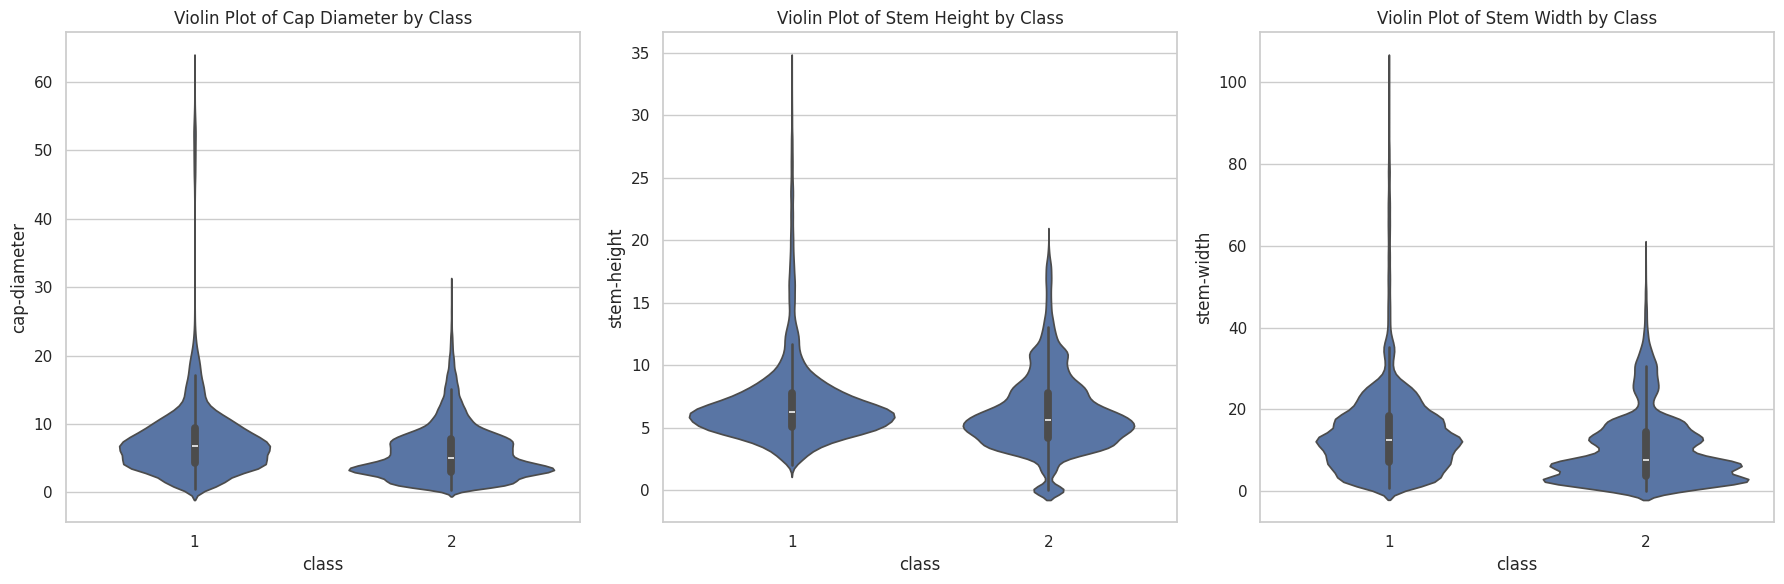

In [ ]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Создаем множество скрипичных графиков
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Скрипичный график для cap-diameter
sns.violinplot(x='class', y='cap-diameter', data=dataset, ax=axs[0])
axs[0].set_title('Violin Plot of Cap Diameter by Class')

# Скрипичный график для stem-height
sns.violinplot(x='class', y='stem-height', data=dataset, ax=axs[1])
axs[1].set_title('Violin Plot of Stem Height by Class')

# Скрипичный график для stem-width
sns.violinplot(x='class', y='stem-width', data=dataset, ax=axs[2])
axs[2].set_title('Violin Plot of Stem Width by Class')

# Показать график
plt.tight_layout()
plt.show()

1. Cap Diameter

* Съедобные грибы (класс 1):

Распределение диаметра шляпки показывает, что большинство значений сконцентрированы около 3-10 см, с длинным вытянутым "хвостом" до 60 см. Это может указывать на наличие нескольких особей с очень большими диаметрами.

* Ядовитые грибы (класс 2):

В классе 2  также наблюдается пик в диапазоне 3-10 см, но меньше значений с большими диаметрами, что предполагает меньшую вариативность.

2. Stem Height

* Съедобные грибы (класс 1):

Высота стебля съедобных грибов доходит до 30 см, причем основная масса наблюдений сосредоточена в пределах 5-10 см.

* Ядовитые грибы (класс 2):

Высота стебля также сосредоточена в диапазоне 5-10 см, но наблюдается больше значений, превышающих 20 см.

3. Stem Width
* Съедобные грибы (класс 1):

Ширина стебля съедобных грибов обычно колеблется от 1 до 20 мм, с основным числом наблюдений в диапазоне 5-10 мм.

* Ядовитые грибы (класс 2):

Ширина стебля ядовитых грибов также сосредоточена в диапазоне 5-10 мм, но с заметным количеством вариантов шире, что может указывать на более массивные грибы.

##### Выводы:

Визуализация показывает, что грибы в разных классах имеют схожие размеры, но существуют различия в их распределении. Класс ядовитых грибов имеет более широкий диапазон значений для высоты стебля и ширины, возможно, указывая на большее разнообразие форм.

0   class                 61069 non-null  object

1   cap-diameter          61069 non-null  float64

2   cap-shape             61069 non-null  object

3   cap-surface           46949 non-null  object

4   cap-color             61069 non-null  object

5   does-bruise-or-bleed  61069 non-null  object

6   gill-attachment       51185 non-null  object

7   gill-spacing          36006 non-null  object

8   gill-color            61069 non-null  object

9   stem-height           61069 non-null  float64

10  stem-width            61069 non-null  float64

11  stem-root             9531 non-null   object

12  stem-surface          22945 non-null  object

13  stem-color            61069 non-null  object

14  veil-type             3177 non-null   object

15  veil-color            7413 non-null   object

16  has-ring              61069 non-null  object

17  ring-type             58598 non-null  object

18  spore-print-color     6354 non-null   object

19  habitat               61069 non-null  object

20  season                61069 non-null  object


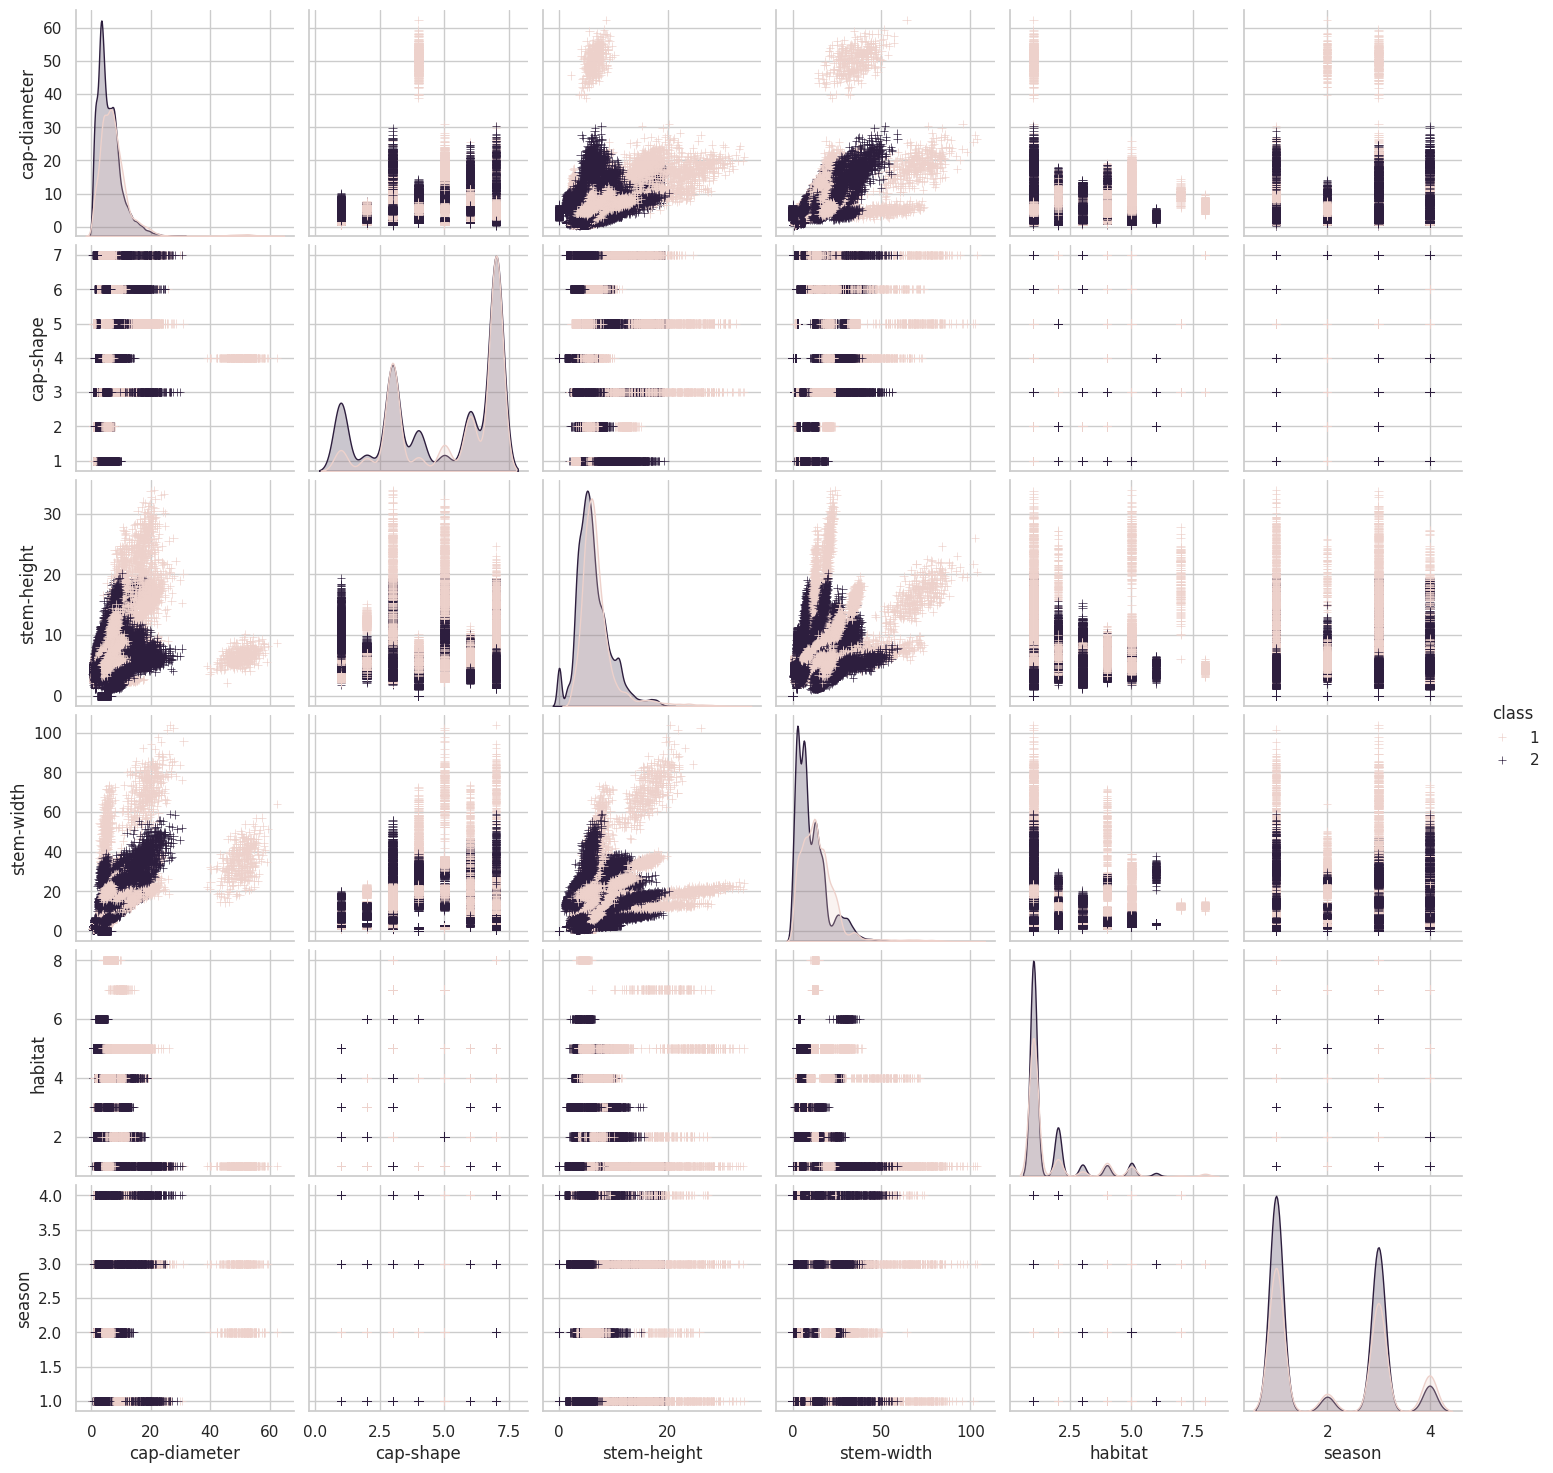

In [ ]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

# Выбираем столбцы для анализа
selected_columns = ['cap-diameter', 'cap-shape', 'stem-height', 'stem-width', 'habitat', 'season', 'class']

# Создаём новый DataFrame с выбранными столбцами
subset = dataset[selected_columns]

# Создаём pairplot
sns.pairplot(subset, hue='class', markers='+')

plt.show()


Наблюдается положительная корреляция между cap-diameter и stem-height, подразумевающая, что большие шляпки связаны с более высокими ножками.

Ярко выраженные различия между классами (съедобные и несъедобные грибы) видны в графиках рассеяния, что поможет в построении моделей классификации.


Выбросы присутствуют в распределении cap-diameter и stem-height.


Взаимосвязь между season и habitat может указать на предпочтения грибов в зависимости от времени года и их среды обитания.

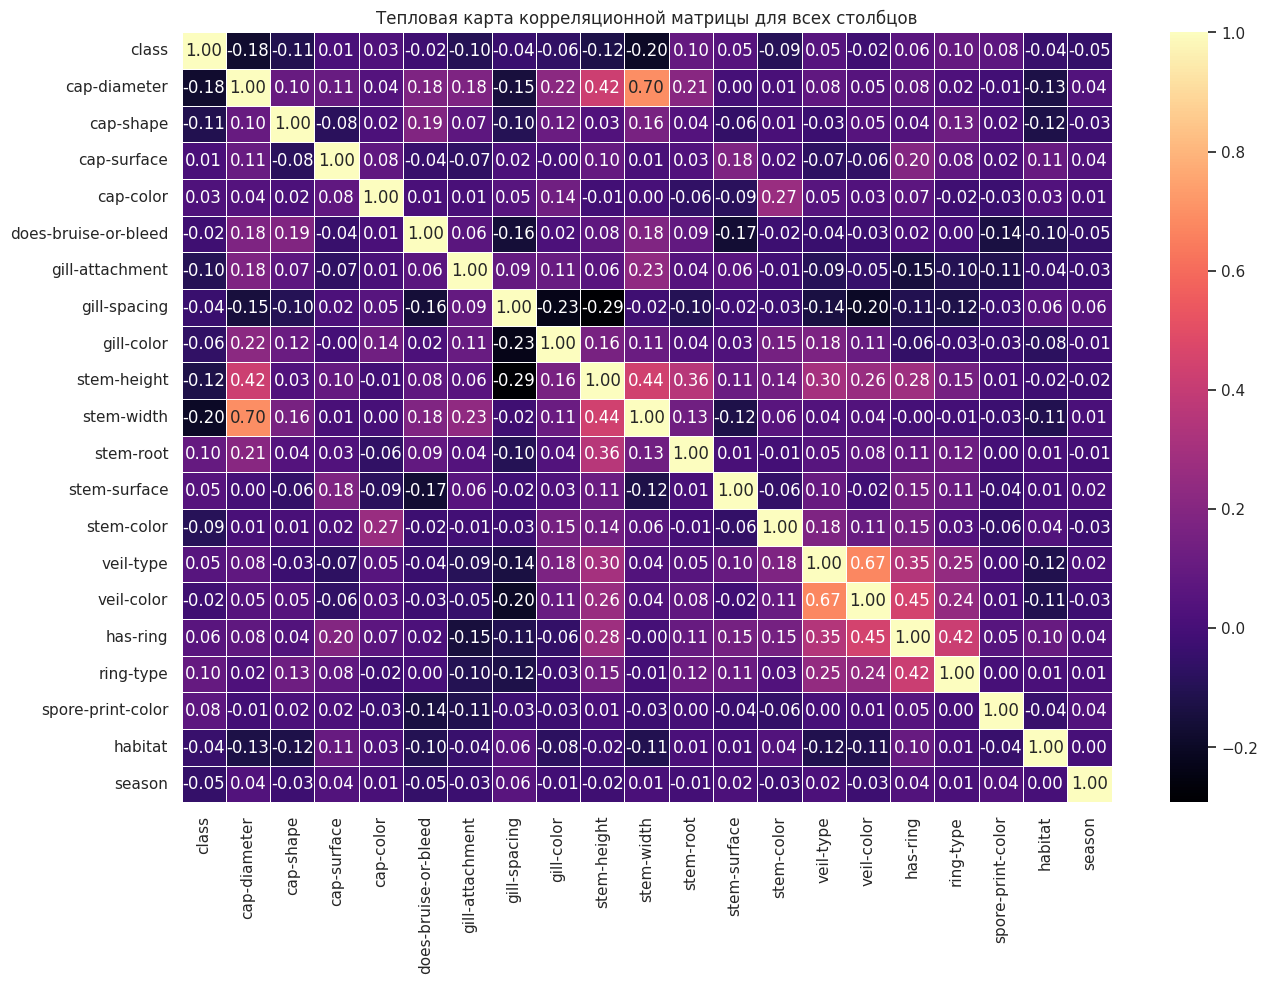

In [ ]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

# Расчет корреляционной матрицы для всех числовых столбцов в датафрейме
corr_matrix = dataset.corr()

# Построение тепловой карты
plt.figure(figsize=(15, 10))  # Увеличение размера графика для лучшей читаемости
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляционной матрицы для всех столбцов')
plt.show()

Очень подробное и понятное описание возможностей построения графиков с помощью Matplotlib и Pandas с примерами кода можно найти здесь:

https://colab.research.google.com/drive/1ggUqm3C-Jk3dcMeibMW88FZLu7vtJ2k8?usp=sharing


# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец class.

В X складываем весь набор данных без целевой переменной.


In [ ]:
X = dataset.drop(['class'], axis=1)
y = dataset['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (61069, 20) | y shape: (61069,) 


X имеет 61069 строк и 20 столбцов, тогда как Y имеет 61069 строк и только один столбец.


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [ ]:
import scipy.stats as stats

# Стратифицированное разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, shuffle=True)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-0.0058831355023467825, pvalue=0.995305983308499, df=61067.0)

### Без сртатификации
t-статистика: 15.84. Высокое значение t-статистики указывает на значительные различия между группами.

p-значение: 2.04e-56. Это очень маленькое значение, существенно меньше уровня значимости 0.05. Это подразумевает, что мы можем отвергнуть нулевую гипотезу (гипотезу о равенстве средних) и утверждать, что есть статистически значимые различия между обучающей и тестовой выборкой в отношении целевой переменной class.

Выводы:
Различия в классах между обучающей и тестовой выборками значительны, что может указывать на то, что выборки отличаются друг от друга по какой-то причине.

### Со сртатификацией

Статистика t: -0.0058831355023467825 - это значение t-статистики, которое близко к нулю, что указывает на отсутствие значительного различия между средними значениями двух выборок.

p-значение: 0.995305983308499 - это значение, гораздо больше 0.05 (обычный уровень значимости). Это означает, что мы не можем отвергнуть нулевую гипотезу, то есть нет доказательств, что обучающая и тестовая выборки отличаются по целевой переменной.

Стратификация в контексте разделения данных на обучающую и тестовую выборки — это метод, который гарантирует, что каждая из выборок будет репрезентативной относительно целевой переменной. В частности, это означает, что пропорции различных классов в обучающей и тестовой выборках будут схожи.

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVC', SVC(gamma='auto'))) слишком долго выполняется

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.658561 (0.007067)
LDA: 0.658950 (0.006376)
KNN: 0.999509 (0.000345)
CART: 0.997707 (0.000858)
NB: 0.619425 (0.004688)


## Обучение конкретной модели
Определяем нашу модель KNN
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [ ]:
# Задание параметров модели KNN
k_neighbors = 5  # например, 5 соседей
knn_model = KNeighborsClassifier(n_neighbors=k_neighbors)

# Обучение модели KNN
knn_model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
knn_pred_res = knn_model.predict(X_test)

# Оценка точности
knn_accuracy = accuracy_score(y_test, knn_pred_res)

# Вывод результатов
print(f'KNN точность: {knn_accuracy}')
print(f'KNN предсказание: {knn_pred_res}')

KNN точность: 0.9999181267398067
KNN предсказание: [2 2 1 ... 2 2 1]


## Визуализация решения

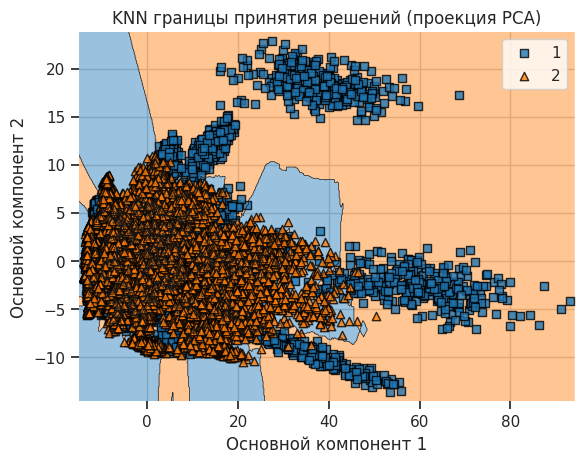

In [ ]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# Применяем PCA для снижения размерности до 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Обучаем модель KNN на пониженном наборе данных
knn_model = KNeighborsClassifier(n_neighbors=k_neighbors)
knn_model.fit(X_pca, y_train)

plt.title('KNN границы принятия решений (проекция PCA)')
plot_decision_regions(X=X_pca, y=y_train.values, clf=knn_model)
plt.xlabel('Основной компонент 1')
plt.ylabel('Основной компонент 2')
plt.legend(loc='best')
plt.show()


In [ ]:
# Применяем PCA к тестовым данным
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

# Получаем предсказания на тестовой выборке
predicted = knn_model.predict(X_test_pca)

# Оценка точности на тестовом наборе данных
accuracy = metrics.accuracy_score(y_test, predicted)
print("Точность:", round(accuracy, 2))

# Получаем Precision и Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")

print("recall:", round(recall, 2))
print("precision:", round(precision, 2))
print("Детали:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y)]))


Точность: 0.73
recall: 0.73
precision: 0.73
Детали:
              precision    recall  f1-score   support

           1       0.70      0.69      0.70      5436
           2       0.76      0.76      0.76      6778

    accuracy                           0.73     12214
   macro avg       0.73      0.73      0.73     12214
weighted avg       0.73      0.73      0.73     12214

